# Kraljic Matrix analisys

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

### Importing well known libraries
#### Now I probably download datasets and I will look at it

In [4]:
path = kagglehub.dataset_download("shahriarkabir/procurement-strategy-dataset-for-kraljic-matrix")
path = path + r'/realistic_kraljic_dataset.csv' 
matrix_df = pd.read_csv(path)
matrix_df.head()

100%|██████████| 13.5k/13.5k [00:00<00:00, 13.4MB/s]

Extracting files...


,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [8]:
matrix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [22]:
matrix_df.isnull().values.any()

False

### So data looks good, no NaN value or any strange dtype in columns

### Ok I think that good idea is showing Kraljic Matrix

In [142]:
matrix_df['Kraljic_Category'].value_counts()

Kraljic_Category
Strategic       250
Bottleneck      250
Leverage        250
Non-Critical    250
Name: count, dtype: int64

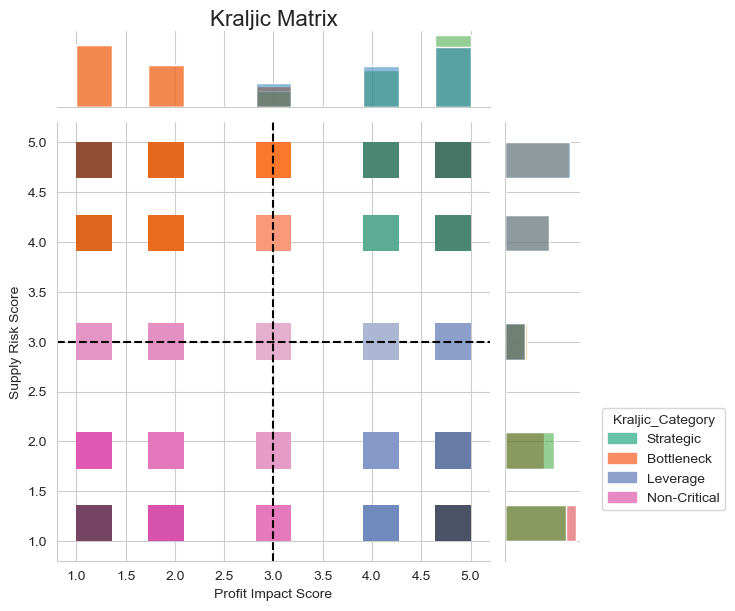

In [186]:
sns.set_style("whitegrid")


ax = sns.jointplot(
                    data = matrix_df
                    ,x='Profit_Impact_Score'
                    ,y='Supply_Risk_Score'
                    ,hue='Kraljic_Category'
                    ,kind="hist"
                    ,palette='Set2'
                    )

sns.move_legend(ax.ax_joint, loc = 'lower center', bbox_to_anchor=(1.4, 0.1))

plt.title('Kraljic Matrix',y=1.2,fontsize = 16)
plt.xlabel('Profit Impact Score')
plt.ylabel('Supply Risk Score')

plt.axhline(3,color='black',linestyle='--')
plt.axvline(3,color='black',linestyle='--')

plt.show()